# Standard Bayesian Inference Task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [2]:
u = 2
Sigma_u = 1
v_p = 3
Sigma_p = 1

def gaussian(x, mean, sigma):
    return (1 / np.sqrt(2*np.pi*sigma)) * np.exp(-np.square(x - mean) / (2*sigma))

def g(v):
    return np.square(v)

def p_v(v):
    return gaussian(v, v_p, Sigma_p)

def p_u_given_v(u, v):
    return gaussian(u, g(v), Sigma_u)

def p_u(u):
    return integrate.quad(lambda v: p_v(v) * p_u_given_v(u, v), -np.inf, np.inf)[0]

def posterior(v, u):
    return (p_v(v) * p_u_given_v(u, v)) / p_u(u)


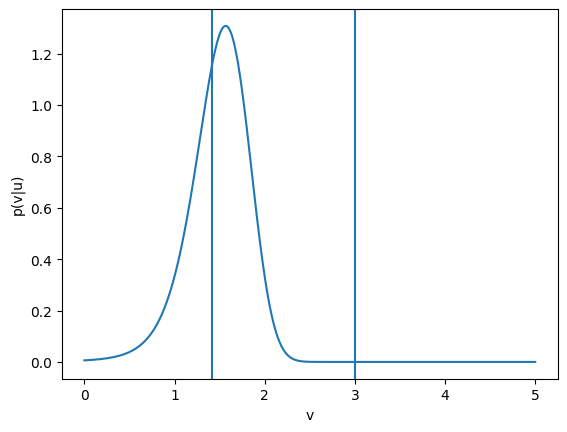

In [3]:
def simulate(max_size=5, step_size=0.01):
    vs = np.linspace(0.0, max_size, int(max_size/step_size))
    p_v_given_u = []
    for v in vs:
        p_v_given_u.append(posterior(v, u))
    
    return vs, np.array(p_v_given_u)
vs, p_v_given_u = simulate()

plt.plot(vs, p_v_given_u)
plt.xlabel('v')
plt.ylabel('p(v|u)')
plt.axvline(v_p)
plt.axvline(np.sqrt(2))
plt.show()